In [1]:
import scipy.io
import numpy as np
from os import listdir
from os.path import isfile, join


def loadEISCATdata(directory, identifiers):
    """
    loads a list of variables from a directory containing EISCAT data files
    Parameters:
    directory: path to the EISCAT .mat files
        string
    identifiers: Variables as a list of strings
        ndarray
    """
    data = np.empty(len(identifiers), dtype = 'object')
    for i, var in enumerate(identifiers):
        data_files = [f for f in listdir(directory) if isfile(join(directory, f)) and f[-3:] == 'mat']
        n = len(data_files)
        mat_data = [scipy.io.loadmat(directory + file) for file in sorted(data_files)]
        data[i] = mat_extract_variable(mat_data, var)
        del mat_data
    return data


def mat_extract_variable(loaded_mat, var):
    """
    Extracts data for variable var from pre-loaded matfiles:
    loaded_mat = scipy.io.loadmat(path_to_file)
    data = loaded_mat('var')
    CAN HANDLE JAGGED ARRAYS (at least in 1 dimension)
    
    Parameters:
    loaded_mat: preloaded mat files as a list
        ndarry
    var: Variable to be extracted
        string
        
    Returns:
    data: all data saved in the loaded_mat['var']
    """
    n = len(loaded_mat)
    var_data = np.array([data[var] for data in loaded_mat])
    
    max_shape = np.amax([i.shape for i in var_data], axis = 0)
    array_size = [n, *max_shape]

    data = np.empty(array_size, dtype = 'object')
    
    for i in range(n):
        data[i, :len(var_data[i])] = var_data[i]
    
    if max_shape.shape == (2,):
        if max_shape[1] == 1:
            data = data.reshape(array_size[:-1])
    return data.astype('float')


In [19]:
directory = '/Users/ost051/Documents/PhD/Electron Precipitation/Data/Eiscat/'
identifiers = ['r_pprange']
r_pprange = loadEISCATdata(directory, identifiers)

/var/folders/gg/y13kmxq903n_0k8qcq3bqf4r0000gp/T/ipykernel_89924/2036438828.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


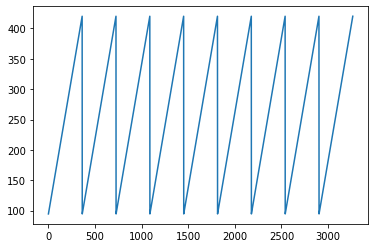

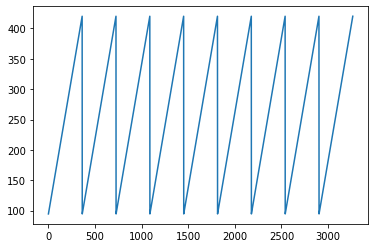

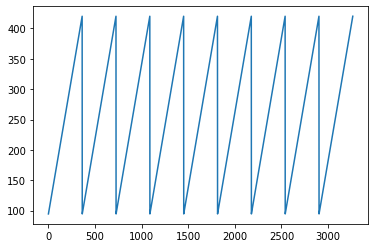

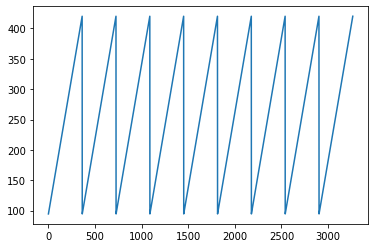

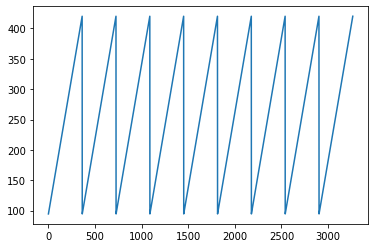

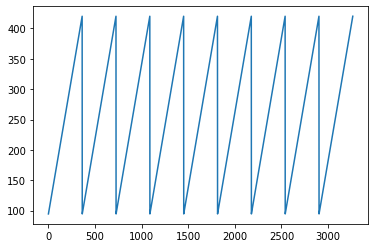

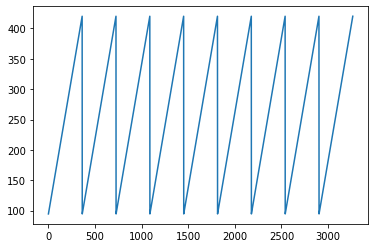

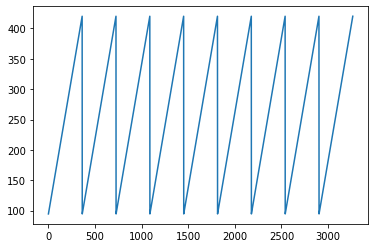

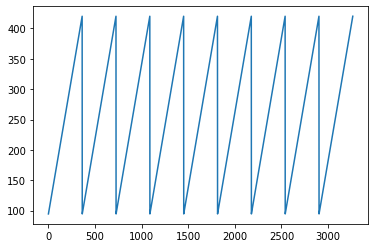

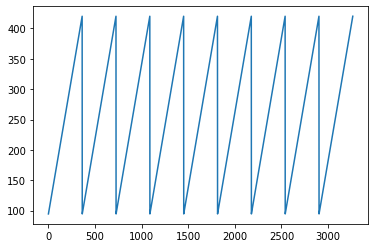

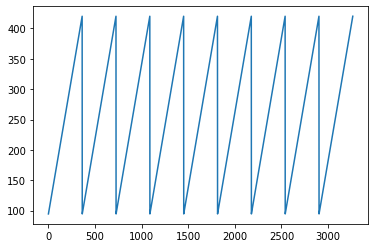

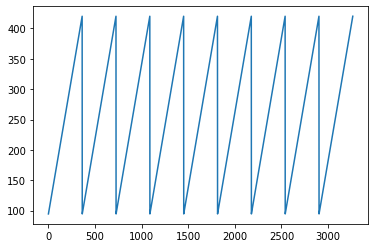

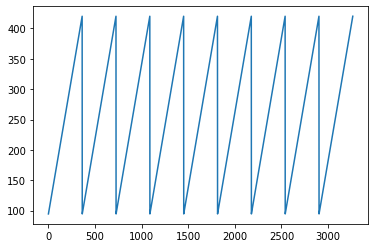

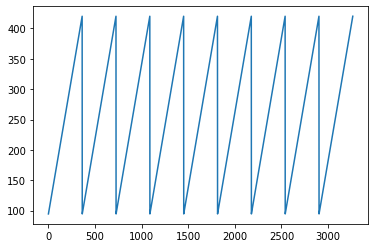

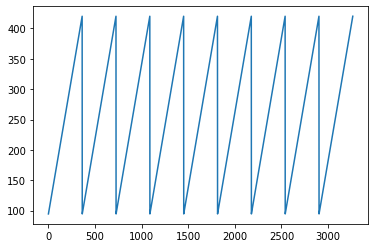

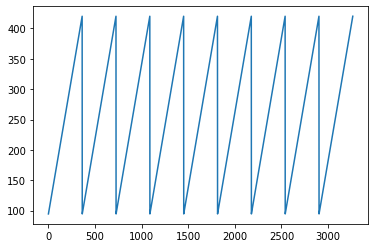

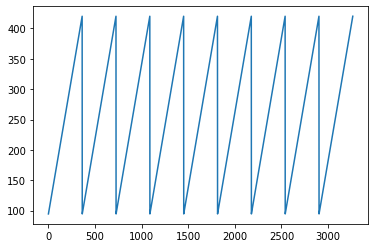

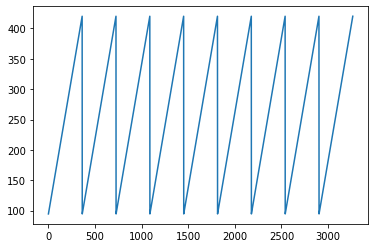

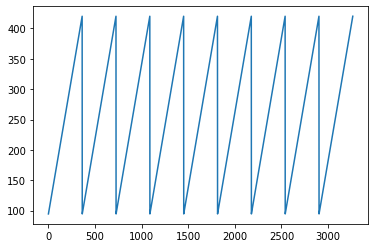

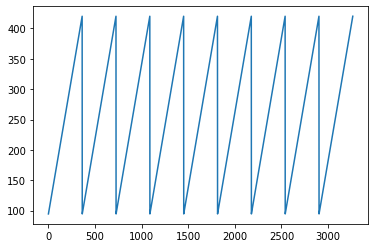

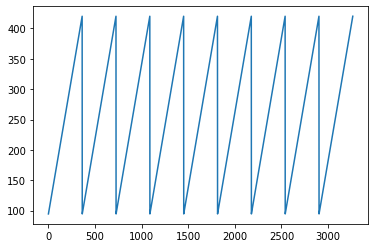

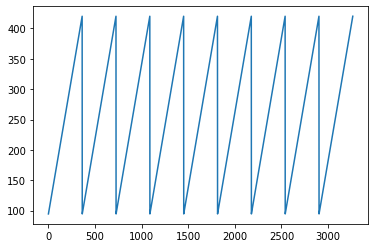

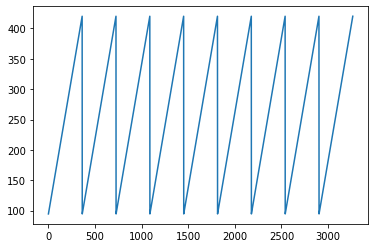

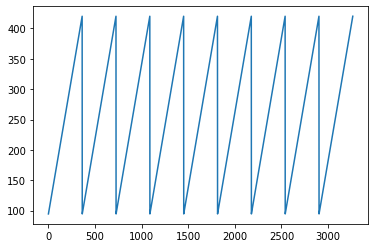

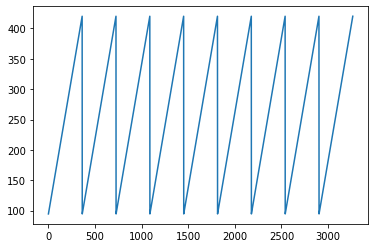

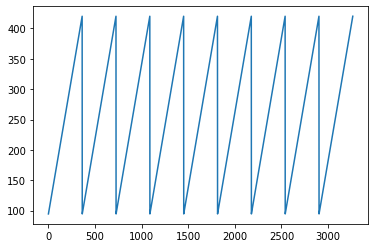

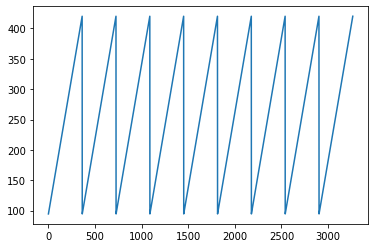

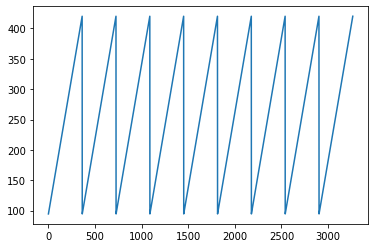

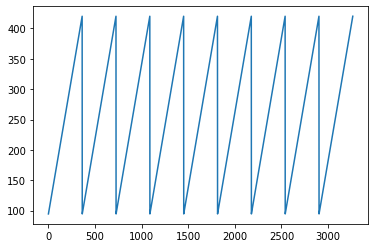

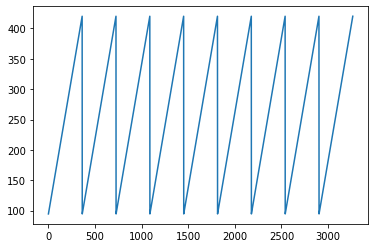

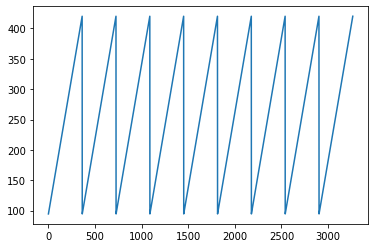

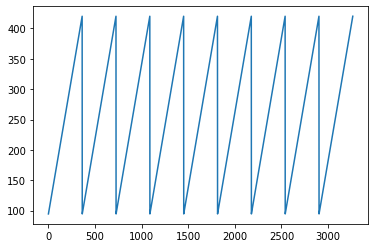

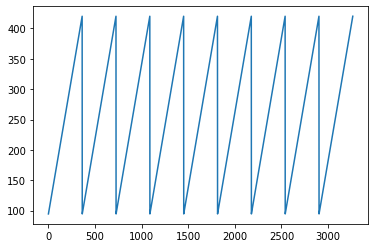

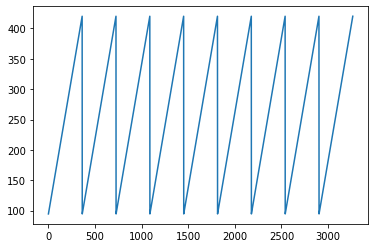

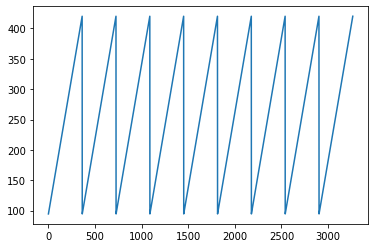

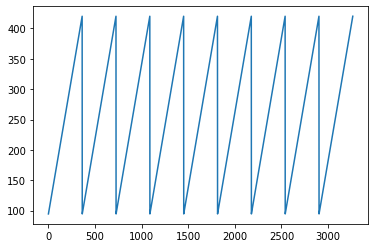

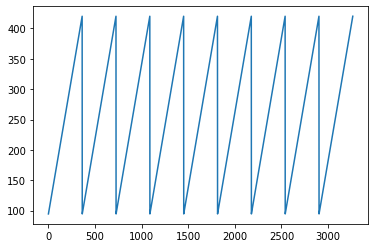

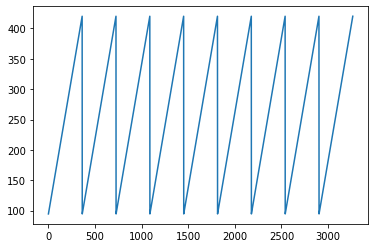

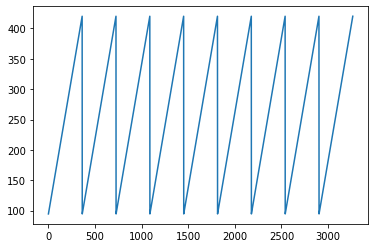

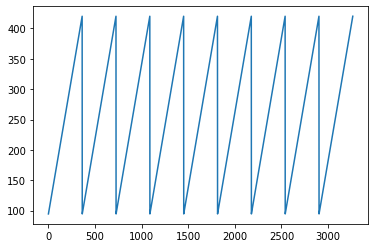

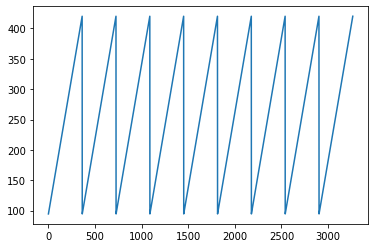

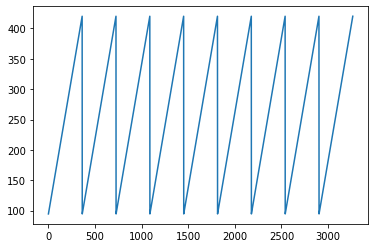

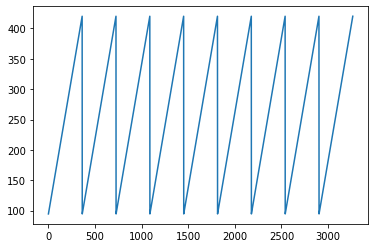

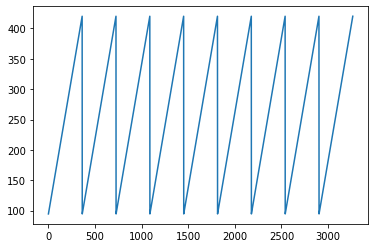

In [27]:
import matplotlib.pyplot as plt
for i in range(len(data_files)):
    plt.figure()
    plt.plot(r_pprange[0][i])

In [9]:
r_pprange[0].shape

(44, 3267)

In [10]:
data_files = [f for f in listdir(directory) if isfile(join(directory, f)) and f[-3:] == 'mat']


In [15]:
len(sorted(data_files))

44